In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
import numpy as np

### Correcting bit flip error

#### Encode

In [2]:
initial_state = [1/np.sqrt(3),np.sqrt(2/3)]
qr = QuantumRegister(3,'data')
ar = QuantumRegister(2,'ancilla')
syn = ClassicalRegister(2,'syndrome')
cr = ClassicalRegister(3,'outcome')
qc = QuantumCircuit(qr,ar,syn,cr)


qc.initialize(initial_state,0)
qc.barrier()

qc.cx(qr[0],qr[1])
qc.cx(qr[0],qr[2])
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'data'), 0), Qubit(QuantumRegister(3, 'data'), 1), Qubit(QuantumRegister(3, 'data'), 2), Qubit(QuantumRegister(2, 'ancilla'), 0), Qubit(QuantumRegister(2, 'ancilla'), 1)), clbits=())

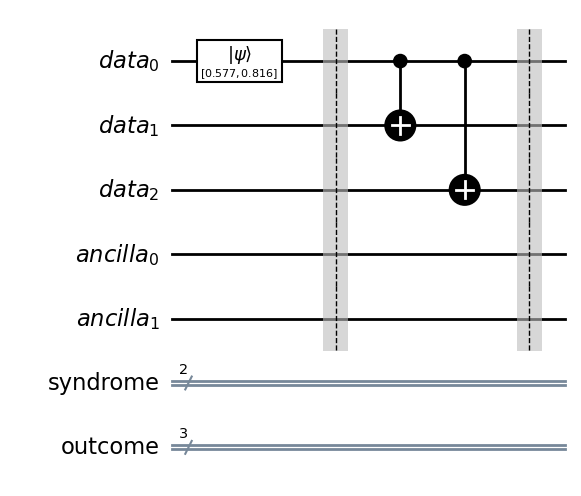

In [3]:
qc.draw('mpl', style='bw', fold=-1)

#### Check the error free outcome

In [4]:
qc_copy = qc.copy()
qc_copy.measure(qr,cr)

counts_ideal = AerSimulator().run(qc_copy,shots=1000).result().get_counts()
counts_ideal

{'000 00': 317, '111 00': 683}

#### Inject error

In [5]:
qc.x(1)
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'data'), 0), Qubit(QuantumRegister(3, 'data'), 1), Qubit(QuantumRegister(3, 'data'), 2), Qubit(QuantumRegister(2, 'ancilla'), 0), Qubit(QuantumRegister(2, 'ancilla'), 1)), clbits=())

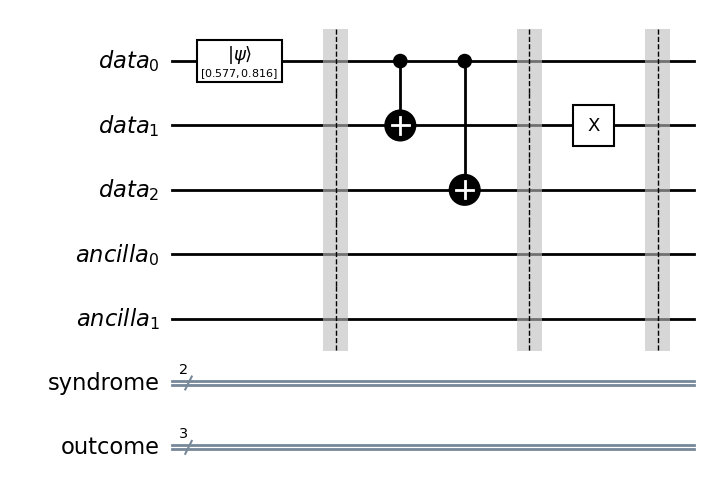

In [6]:
qc.draw('mpl', style='bw', fold=-1)

#### Syndrome extraction

In [7]:
qc.cx(qr[0],ar[0])
qc.cx(qr[1],ar[0])
qc.cx(qr[1],ar[1])
qc.cx(qr[2],ar[1])
qc.barrier()

qc.measure(ar,syn)

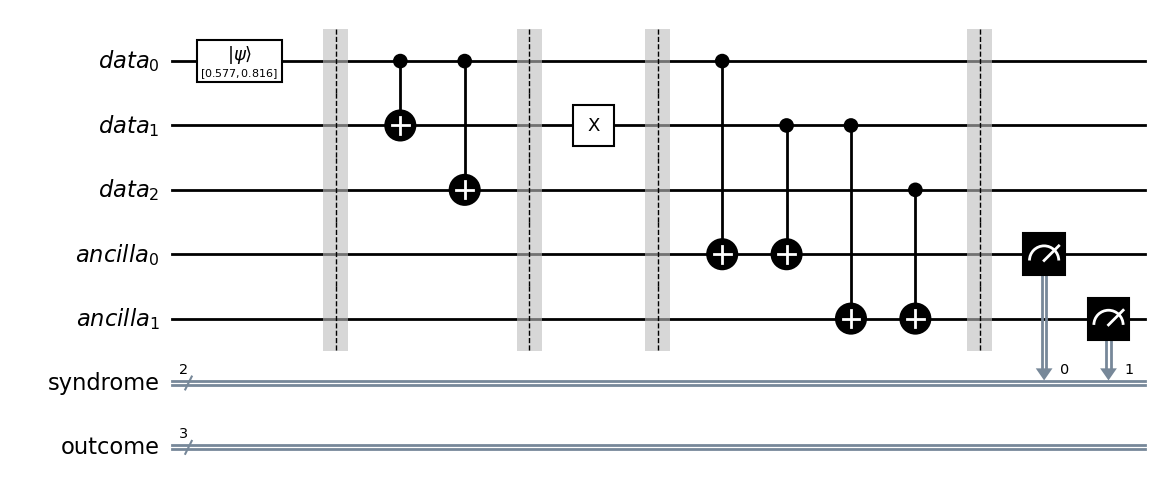

In [8]:
qc.draw('mpl', style='bw', fold=-1)

#### Apply correction

In [9]:
with qc.if_test((syn,1)):
    qc.x(qr[0])
with qc.if_test((syn,2)):
    qc.x(qr[2])
with qc.if_test((syn,3)):
    qc.x(qr[1])

qc.measure(qr,cr)

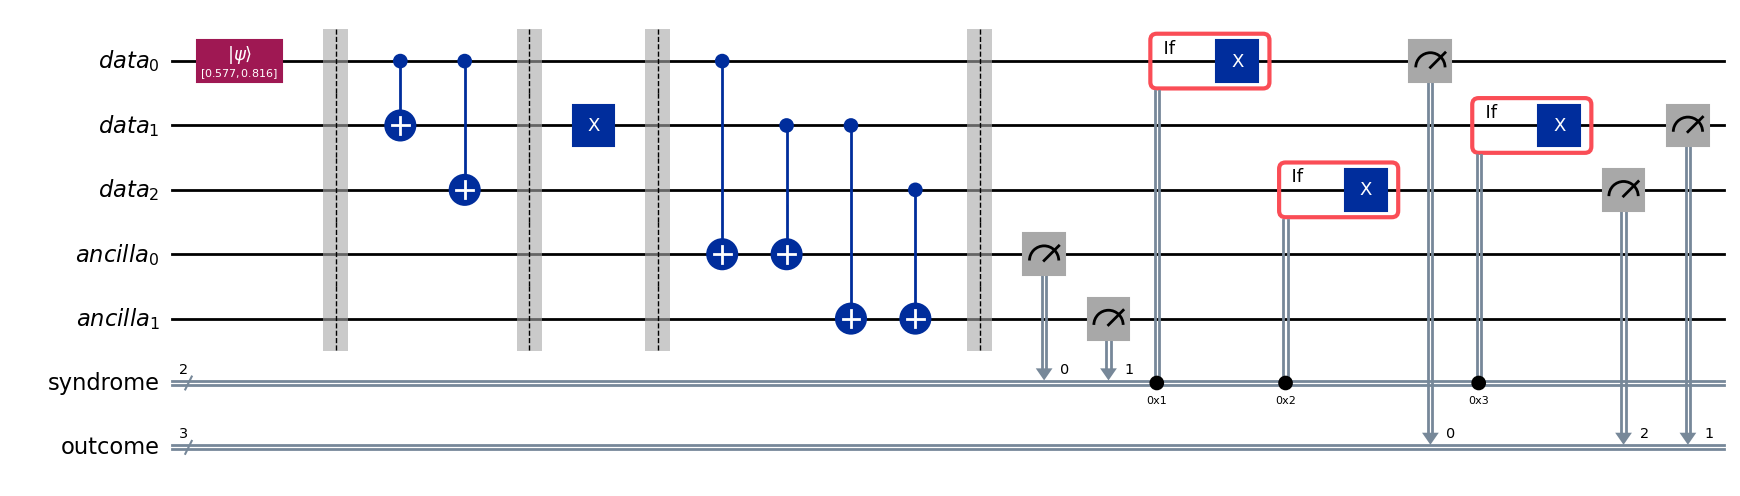

In [10]:
qc.draw('mpl')

In [11]:
counts = AerSimulator().run(qc,shots=1000).result().get_counts()
counts

{'111 11': 649, '000 11': 351}